# Analysis of taxi rides in New York City

In this notebook, we will analyse a dataset about the taxi rides taken in New York City. We will be analysing some trends over the course of x months and then see if the weather has any impact on the rides using a weather API.

# Loading packages

We will need to load some of the important packages at the beginning.
The two that we will need for sure are pandas (pd) and numpy (np).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Load the data

We are loading 3 number of months that will add up to more than 1 million rows. Through filtering and merging, we will reach the 1 million rows limit. However, sincee we are looking at trends, we will create one graph to see change over time.

In [3]:
jan = pd.read_csv('Data/Monthly/yellow_tripdata_2020_01.csv', low_memory=False)
feb = pd.read_csv('Data/Monthly/yellow_tripdata_2020_02.csv', low_memory=False)
mar = pd.read_csv('Data/Monthly/yellow_tripdata_2020_03.csv', low_memory=False)
apr = pd.read_csv('Data/Monthly/yellow_tripdata_2020_04.csv', low_memory=False)
may = pd.read_csv('Data/Monthly/yellow_tripdata_2020_05.csv', low_memory=False)
jun = pd.read_csv('Data/Monthly/yellow_tripdata_2020_06.csv', low_memory=False)
jul = pd.read_csv('Data/Monthly/yellow_tripdata_2020_07.csv', low_memory=False)
aug = pd.read_csv('Data/Monthly/yellow_tripdata_2020_08.csv', low_memory=False) 
sep = pd.read_csv('Data/Monthly/yellow_tripdata_2020_09.csv', low_memory=False)
octb = pd.read_csv('Data/Monthly/yellow_tripdata_2020_10.csv', low_memory=False)
nov = pd.read_csv('Data/Monthly/yellow_tripdata_2020_11.csv', low_memory=False)
dec = pd.read_csv('Data/Monthly/yellow_tripdata_2020_12.csv', low_memory=False)

 We are merging all the tables together to create one table for whole spring.

In [4]:
df = jan.append(feb).append(mar).append(apr).append(may).append(jun).append(jul).append(aug).append(sep).append(octb).append(nov).append(dec)

In [5]:
len(df.index)

24648499

This combined dataset has too many rows (we would like to have 1 million maximum). Let's do some cleaning and filtering.

### Cleaning of full data

We dropped all the rows where we had at least one missing observation. We have plenty of observations, so we will still end up with enough data.

In [6]:
df.dropna(inplace=True)

Filter to the data to only trips by vendor 1

In [7]:
df = df[df['VendorID'] == 1]

This looks better.

In [8]:
len(df.index)

7930565

Change pickup and dropoff times to datatime objects

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M')

Make a separate column which only has the date

In [10]:
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date

Look at number of rides each day in our timeframe

In [11]:
df_grouped = df.groupby('pickup_date').size().reset_index()
df_grouped.columns=['pickup_date', 'nb_trips']

In [12]:
len(df_grouped.index)

366

<AxesSubplot:xlabel='pickup_date', ylabel='nb_trips'>

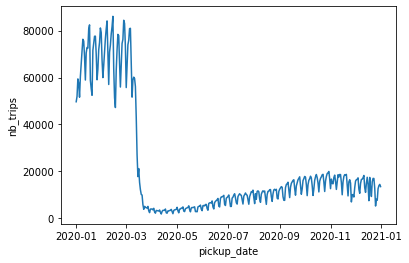

In [13]:
sns.lineplot(data = df_grouped, x = 'pickup_date', y = 'nb_trips')


#### We can already see really interesting patterns.

**1.** There is a huge drop in the number of rides between March and the other months. This is due to Covid. Last year On the 15th of March all New York City schools were ordered to close and on the 20th a state-wide stay-at-home order declared. This decreased the number of taxi rides significantly.

**2.** We already see a cyclical pattern in the data.



In [14]:
jan =df[(df["pickup_date"] >= dt.date(2020, 1, 1)) & (df["pickup_date"] <= dt.date(2020, 1, 31))]
len(jan.index)

2094439

In [15]:
feb =df[(df["pickup_date"] >= dt.date(2020, 2, 1)) & (df["pickup_date"] <= dt.date(2020, 2, 29))]
len(feb.index)

2056411

In [18]:
mar =df[(df["pickup_date"] >= dt.date(2020, 3, 1)) & (df["pickup_date"] <= dt.date(2020, 3, 31))]
len(mar.index)

988227

To be able to analyze the normal trend and patterns according taxi rides we decided to use january only as in 2020 only January and Febuary will be representative of average commuting as Covid highly effect this industry.

With these filterings we managed to bring down the cound of the observations to under 1 million, which we can use now for analysis.

## Data cleaning of only January

Now that we have the data that we will work with, we can look into what is needed in terms of data cleaning.

In [16]:
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339543,1.0,2020-01-31 23:31:46,2020-01-31 23:41:29,1.0,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
6339544,1.0,2020-01-31 23:26:26,2020-01-31 23:48:26,1.0,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
6339550,1.0,2020-01-31 23:02:57,2020-01-31 23:15:20,4.0,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
6339551,1.0,2020-01-31 23:25:53,2020-01-31 23:35:44,1.0,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


Looks like there are some columns that have NA values or somehow shorted, so we will filter those out first. After that we will filter the data by vendor ID and use just 1 so that we can include more variaty in the date (as in more time).

In [17]:
jan = jan.reset_index()
jan = jan.drop('index', axis = 1)
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1.0,2020-01-31 23:31:46,2020-01-31 23:41:29,1.0,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
2094435,1.0,2020-01-31 23:26:26,2020-01-31 23:48:26,1.0,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
2094436,1.0,2020-01-31 23:02:57,2020-01-31 23:15:20,4.0,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
2094437,1.0,2020-01-31 23:25:53,2020-01-31 23:35:44,1.0,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


In [18]:
jan.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date                      object
dtype: object

Looks like the one thing we need to change is the datetime columns. They should be transformed into actual datetime instead of objects.
We can also change the store_and_fwd_flag, payment_type,pickup and dropoff locations into a categorical since they are factors.

In [19]:
jan['store_and_fwd_flag'] = jan.store_and_fwd_flag.astype('category')
jan['payment_type'] = jan.payment_type.astype('category')
jan['PULocationID'] = jan.PULocationID.astype('category')
jan['DOLocationID'] = jan.DOLocationID.astype('category')
jan['RatecodeID'] = jan.RatecodeID.astype('category')

In [20]:
jan['VendorID'] = jan.VendorID.astype('int')
jan['passenger_count'] = jan.passenger_count.astype('int')

In [21]:
jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date                      object
dtype: object

In [22]:
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1,2020-01-31 23:31:46,2020-01-31 23:41:29,1,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
2094435,1,2020-01-31 23:26:26,2020-01-31 23:48:26,1,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
2094436,1,2020-01-31 23:02:57,2020-01-31 23:15:20,4,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
2094437,1,2020-01-31 23:25:53,2020-01-31 23:35:44,1,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


Now the data looks much more organized. Everything is in the correct format and now represents something meaningful. With this data, we can now do analysis.

## Analytics

### Question 1

Questions 1 will address the first point we would like to analyse. What kind of patterns can we find in the data?
Some of the things we are considering analysing are the number of trips over the day, a week, or a month. Average distribution of the total amount over these time windows. These data split by Rate type or type of payment.

#### Creating columns for anaylsis

To be able to analyse we first need to create some additional columns.
We will extract the hours, days, and days of the week from the date.
For this we will use the pickup time since that is more presentative when trying to analyse when people need taxis.

In [23]:
jan['day'] = jan['tpep_pickup_datetime'].dt.day
jan['hour'] = jan['tpep_pickup_datetime'].dt.hour
jan['dayofweek'] = jan['tpep_pickup_datetime'].dt.day_name()

#### Create dataframes for the different time increments

Now we can create dataframes for the hour, day and the weekdays. This will show us distributions that we can later graph.

In [24]:
jan_by_hour = jan.groupby('hour').size()
jan_by_day = jan.groupby('day').size()
jan_by_dayofweek = jan.groupby('dayofweek', sort = False).size()

<AxesSubplot:xlabel='day'>

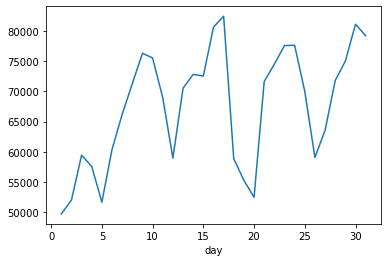

In [28]:
jan_by_day.plot()

<AxesSubplot:xlabel='dayofweek'>

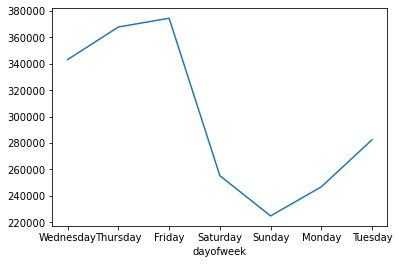

In [27]:
jan_by_dayofweek.plot()

<AxesSubplot:xlabel='hour'>

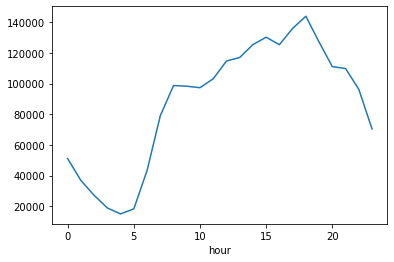

In [29]:
jan_by_hour.plot()

Looks like there is a pattern on a weekly and hourly basis but not necessarily on a monthly basis.
On a weekly basis we can see that there are significantly less trips during the weekend which may indicate that people use taxis more for tasks related to work than leasure. They are the highest in Friday though so maybe on Friday people also use them to go to and come from evening events.
On an hourly basis it seems that trips increase around 6AM when people start going to work. They increase even further during the day until about 4PM which is most likely people taking taxis to meeting across the city. They then drop in the evening hours when there are less people moving around the city. 

In [30]:
avg_fair_by_hour = jan.groupby(['hour','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_day = jan.groupby(['day','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_dayofweek = jan.groupby(['dayofweek','passenger_count'], sort = False).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()

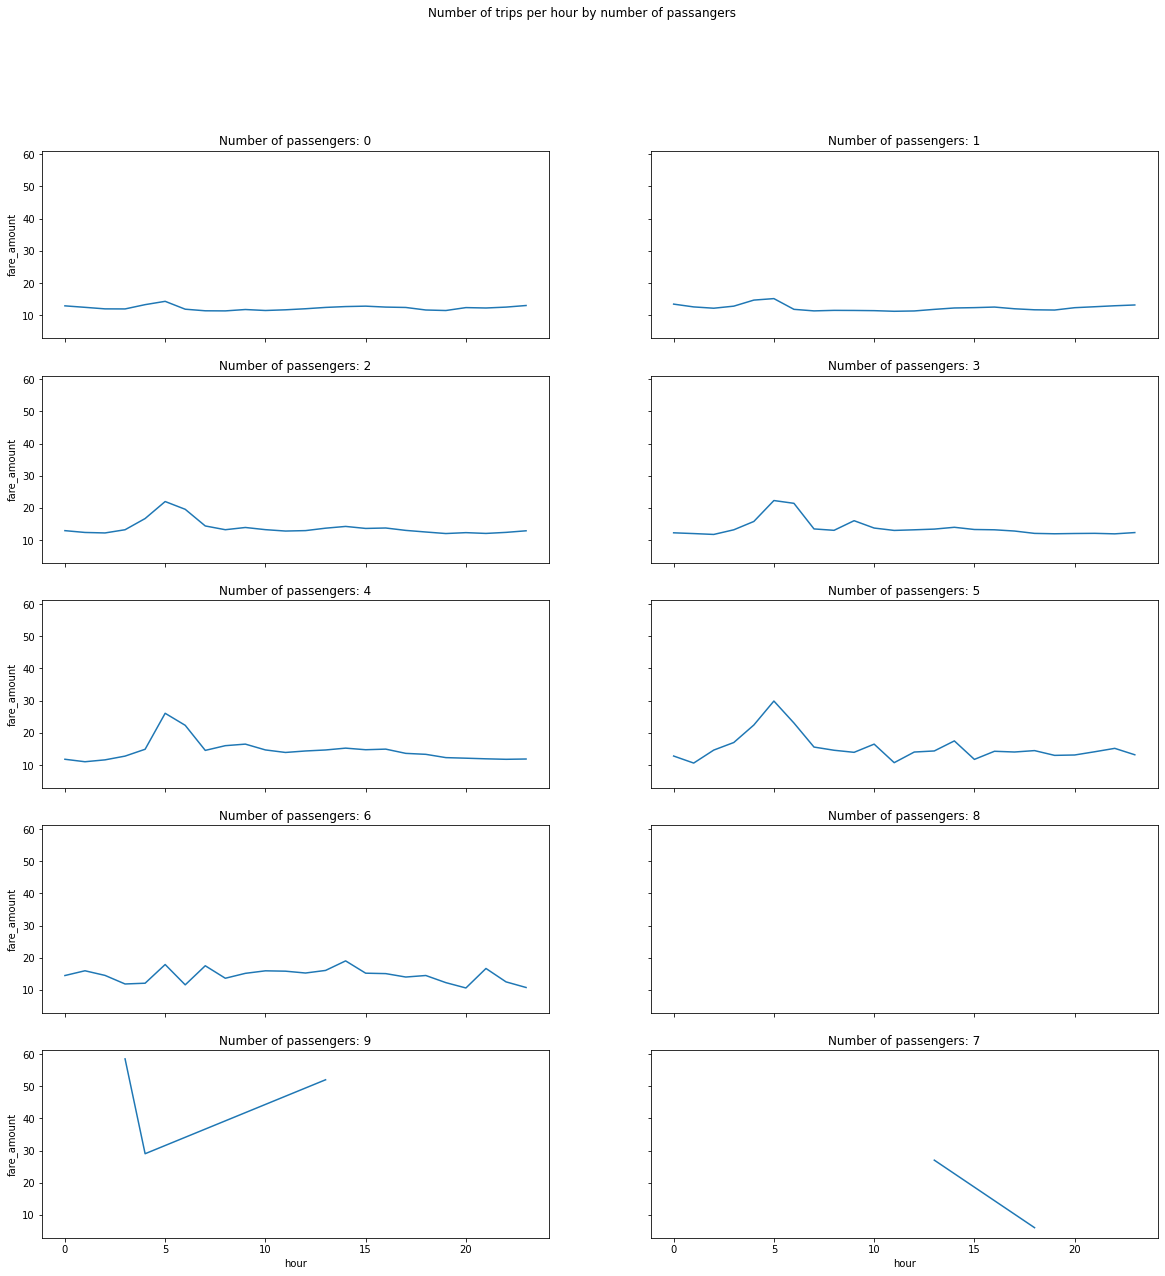

In [32]:
passenger_count = avg_fair_by_hour.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per hour by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_hour[avg_fair_by_hour['passenger_count'] == passenger],
                 x = 'hour', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Looks like trips with people with between 7 to 9 people are very rare. They seem to happen right before, during, or right after working hours so they are most likely connected to work. The fair amount jumps for all groups around 5 am which is most likely people going to work froma farther distance (maybe on company expense).Interestingly there is a lot of movement with 5 and 6 people which means people may group up for longer trip to share the fare.

<ipython-input-36-f29777a88915>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-36-f29777a88915>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-36-f29777a88915>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-36-f29777a88915>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-36-f29777a88915>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenge

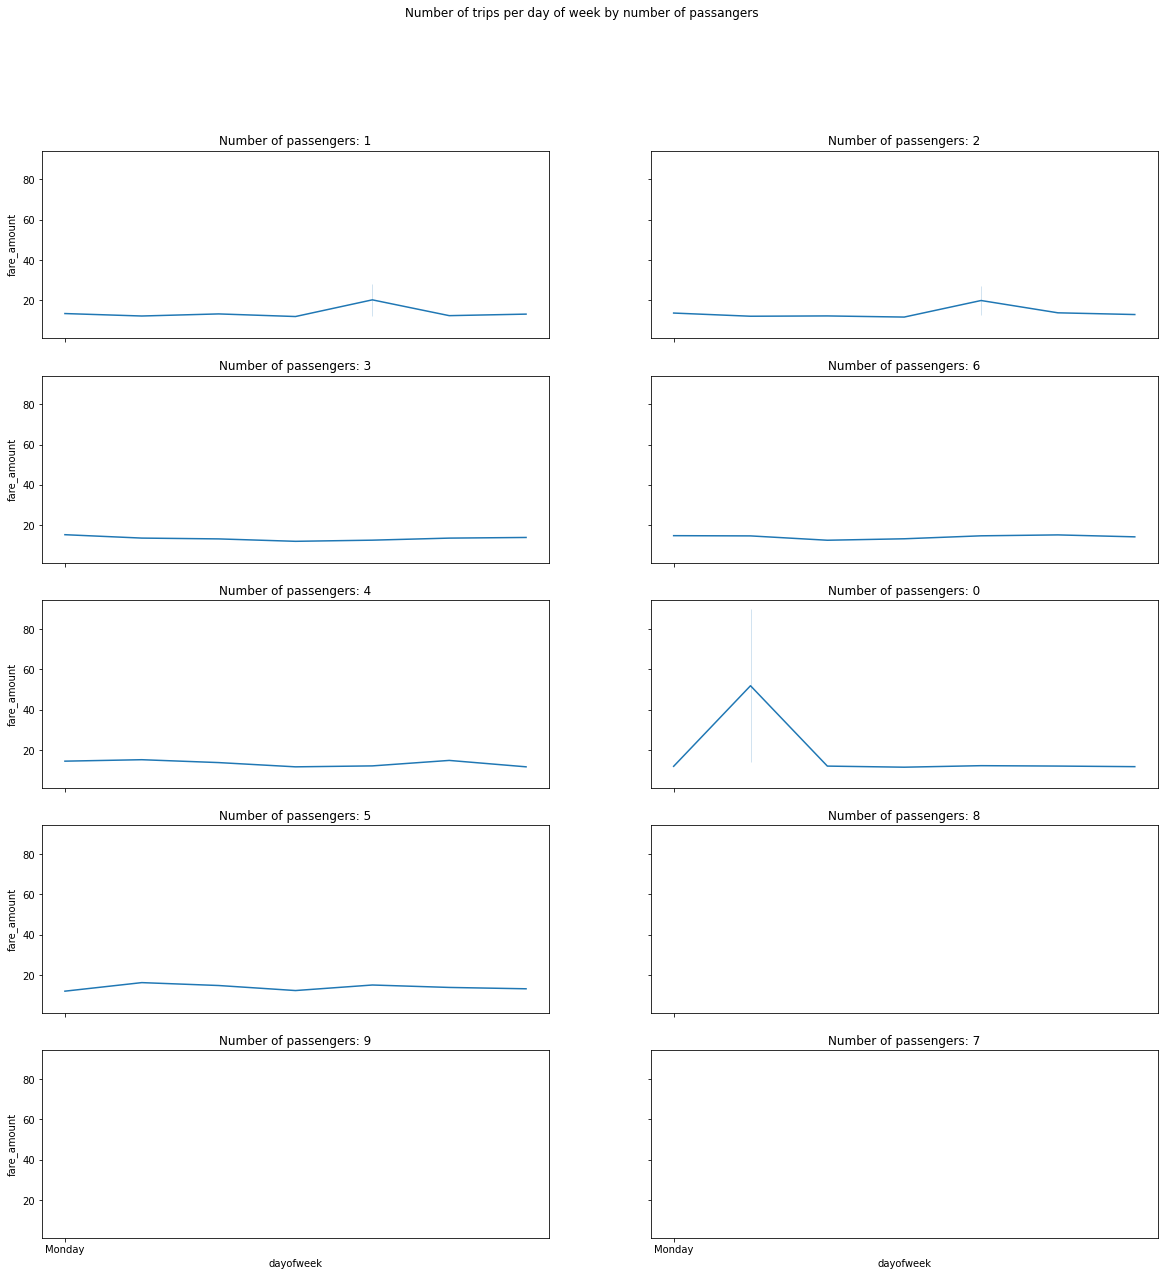

In [36]:
passenger_count = avg_fair_by_dayofweek.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'dayofweek', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Looking like during the week there is not much change in the fair amount except for 0 passengers on a Tuesday. This would be interesting to investigate. 1 and 2 people see a slight increase on Fridays which may be because peopla re taking taxis home from an evening event that day.

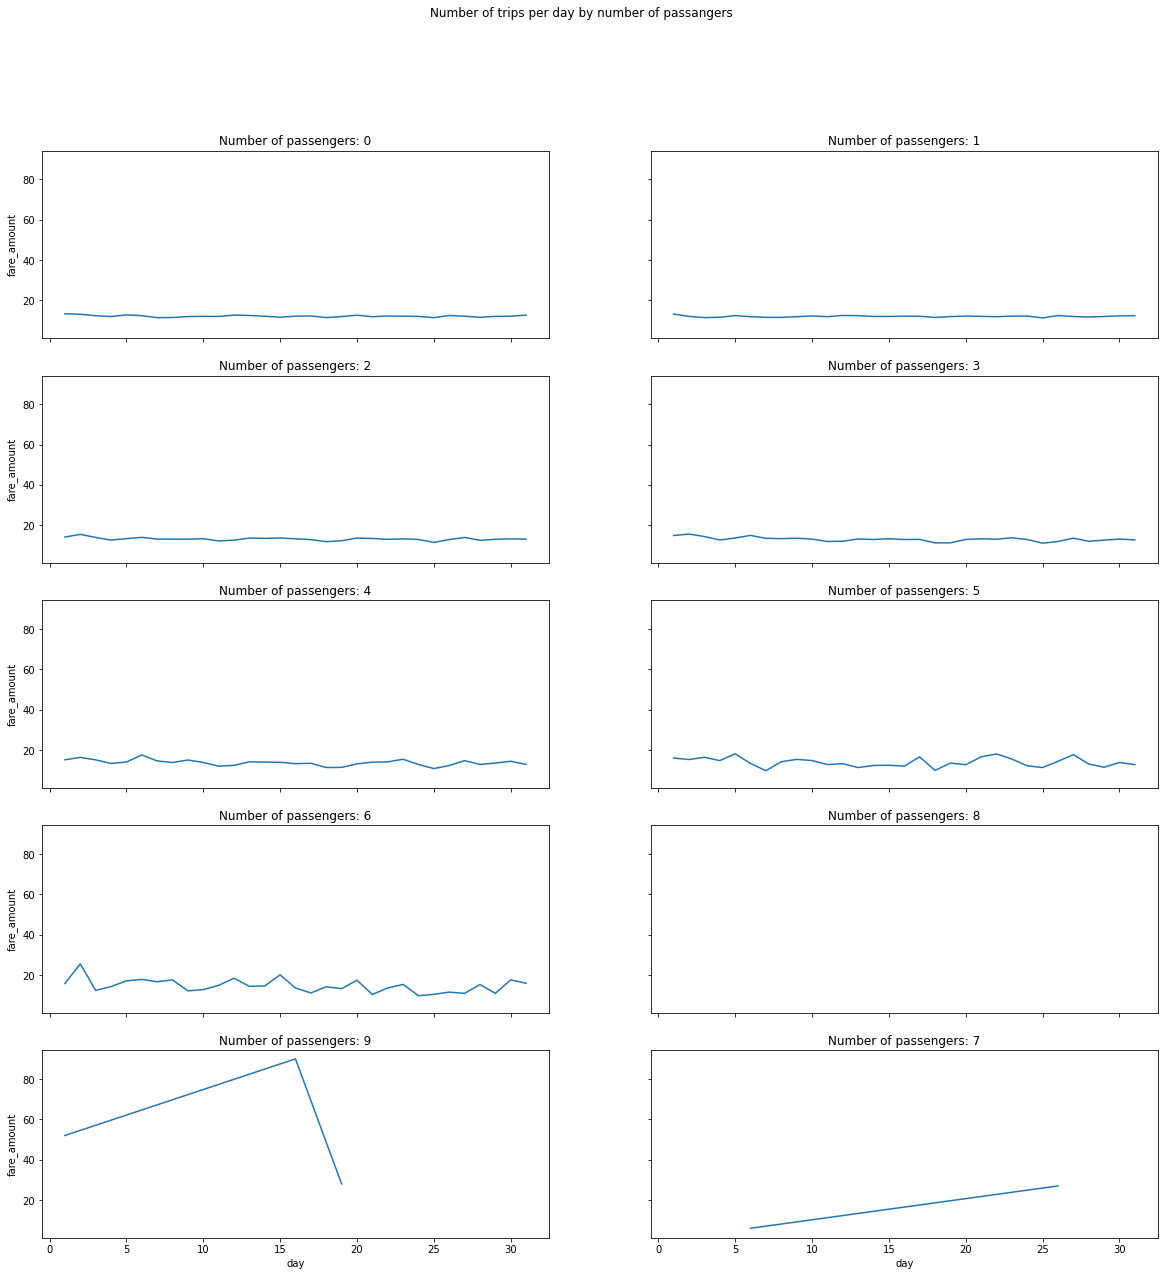

In [34]:
passenger_count = avg_fair_by_day.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_day[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'day', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Over the month the fair amount is pretty stable. This means that while trip numbers vary the distance these trips are do not.
The 7 to 9 passenger trips show a strange pattern but that is probably because of the few amount of trips in this category.

#### Looking at different aspects

In [61]:
fare_type_vs_payment_type = jan.groupby(['RatecodeID', 'payment_type']).size().reset_index()
fare_type_vs_payment_type.columns=['RatecodeID','payment_type','nb_trips']
fare_type_vs_payment_type.drop(fare_type_vs_payment_type.tail(5).index,inplace = True)
fare_type_vs_payment_type_pivot = fare_type_vs_payment_type.pivot(index= 'RatecodeID', columns='payment_type', values='nb_trips')
fare_type_vs_payment_type_pivot

payment_type,1.0,2.0,3.0,4.0,5.0
RatecodeID,,,,,
1.0,1506943,494741,23440,8325,1
2.0,35338,8575,912,316,0
3.0,3090,855,281,89,0
4.0,904,475,92,32,0
5.0,6796,1624,1030,453,0
6.0,2,11,15,6,0


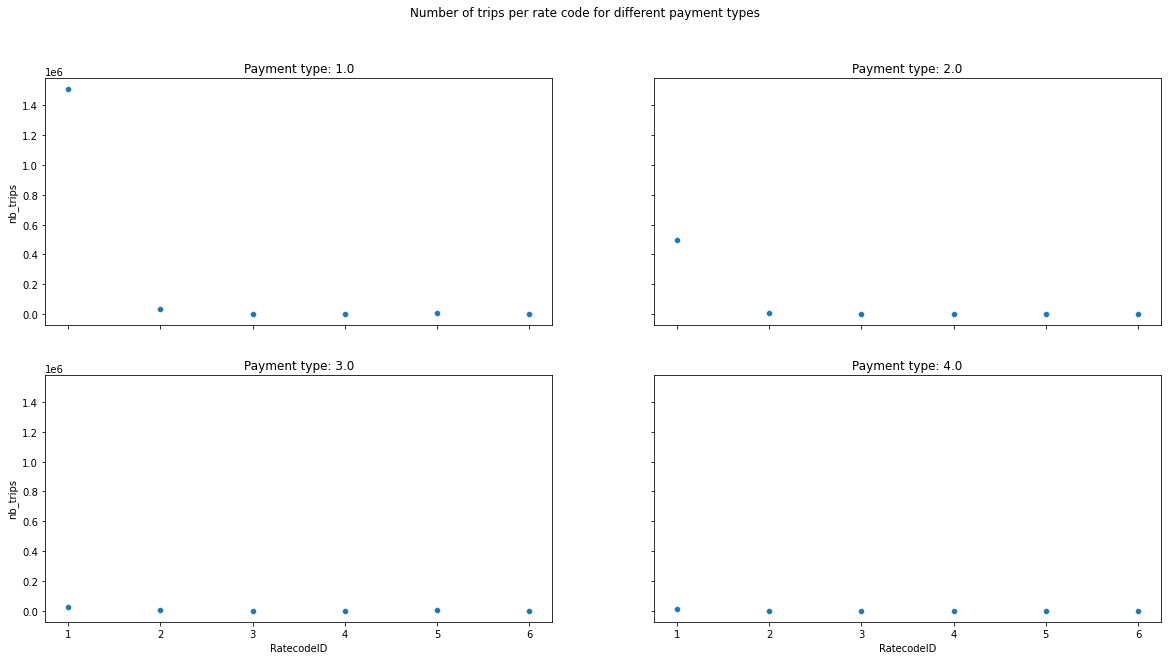

In [65]:
payment_type = [1.0, 2.0, 3.0, 4.0]

fig, axes = plt.subplots(nrows=len(payment_type)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,10))
fig.suptitle('Number of trips per rate code for different payment types')
i = 0
for payment in payment_type:
    sns.scatterplot(data = fare_type_vs_payment_type[fare_type_vs_payment_type['payment_type'] == payment],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Payment type: {}'.format(payment))
    i += 1
plt.show()

So the table shows that most trips very paid by payment type 1 (Credit card) or type 2 (cash). In the graphs we can see that there is significantly more trips for Standard rate for the two more popular payment type. The others are all about equal.

In [69]:
fare_type_vs_pass_count = jan.groupby(['RatecodeID', 'passenger_count']).size().reset_index()
fare_type_vs_pass_count.columns=['RatecodeID','passenger_count','nb_trips']
fare_type_vs_pass_count.drop(fare_type_vs_pass_count.tail(10).index,inplace = True)
fare_type_vs_pass_count_pivot = fare_type_vs_pass_count.pivot(index= 'RatecodeID', columns='passenger_count', values='nb_trips')
fare_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,7,8,9
RatecodeID,,,,,,,,,,
1.0,110103,1523118,298065,65210,34367,1656,926,2,1,2
2.0,2621,29176,10083,1964,1177,55,64,0,0,1
3.0,267,2935,780,188,135,6,4,0,0,0
4.0,79,1078,235,59,40,8,4,0,0,0
5.0,584,6882,1764,403,214,46,9,0,0,1
6.0,3,29,2,0,0,0,0,0,0,0


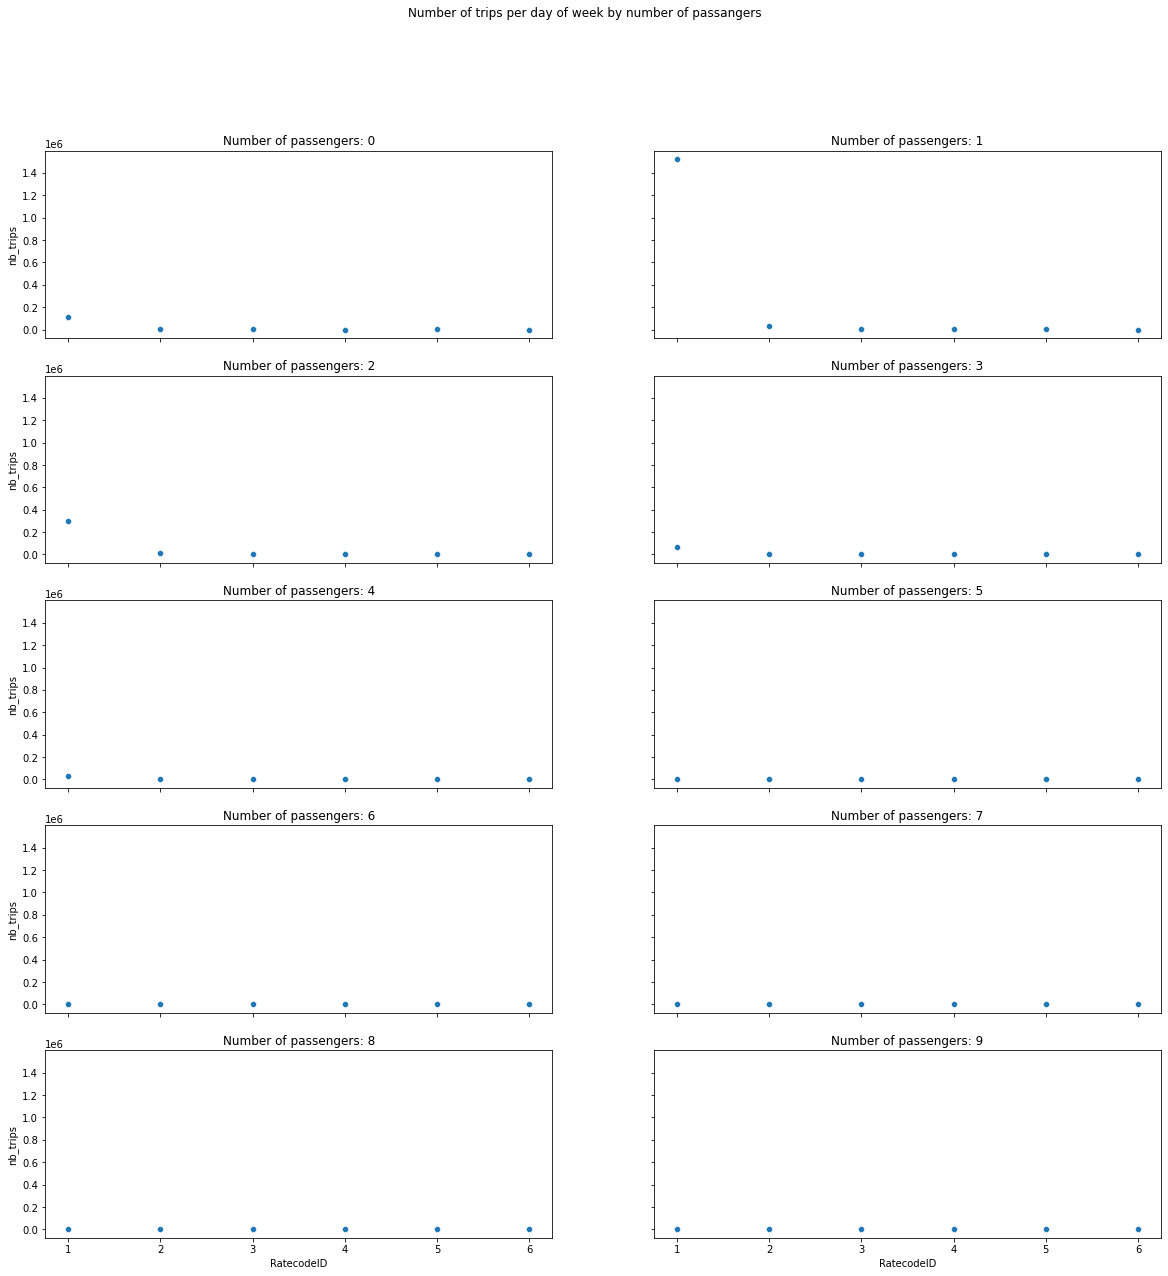

In [71]:
passenger_count = fare_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = fare_type_vs_pass_count[fare_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

The table clearly shows that most trips taken are Standard Fare.
The one significant thing we can see in these graphs that with 1 people trips are almost always Standart Rate trips. There is a small spike for 0 and 2 passengers as well but they are more balanced.

In [72]:
payment_type_vs_pass_count = jan.groupby(['payment_type', 'passenger_count']).size().reset_index()
payment_type_vs_pass_count.columns=['payment_type','passenger_count','nb_trips']
payment_type_vs_pass_count_pivot = payment_type_vs_pass_count.pivot(index='payment_type', columns='passenger_count', values='nb_trips')
payment_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,7,8,9
payment_type,,,,,,,,,,
1.0,82961,1181042,220582,46137,20550,1152,705,1,1,3
2.0,28227,356094,85821,20624,14709,565,256,1,0,1
3.0,1892,19486,3143,751,455,33,25,0,0,0
4.0,650,6612,1385,312,219,22,21,0,0,0
5.0,0,1,0,0,0,0,0,0,0,0


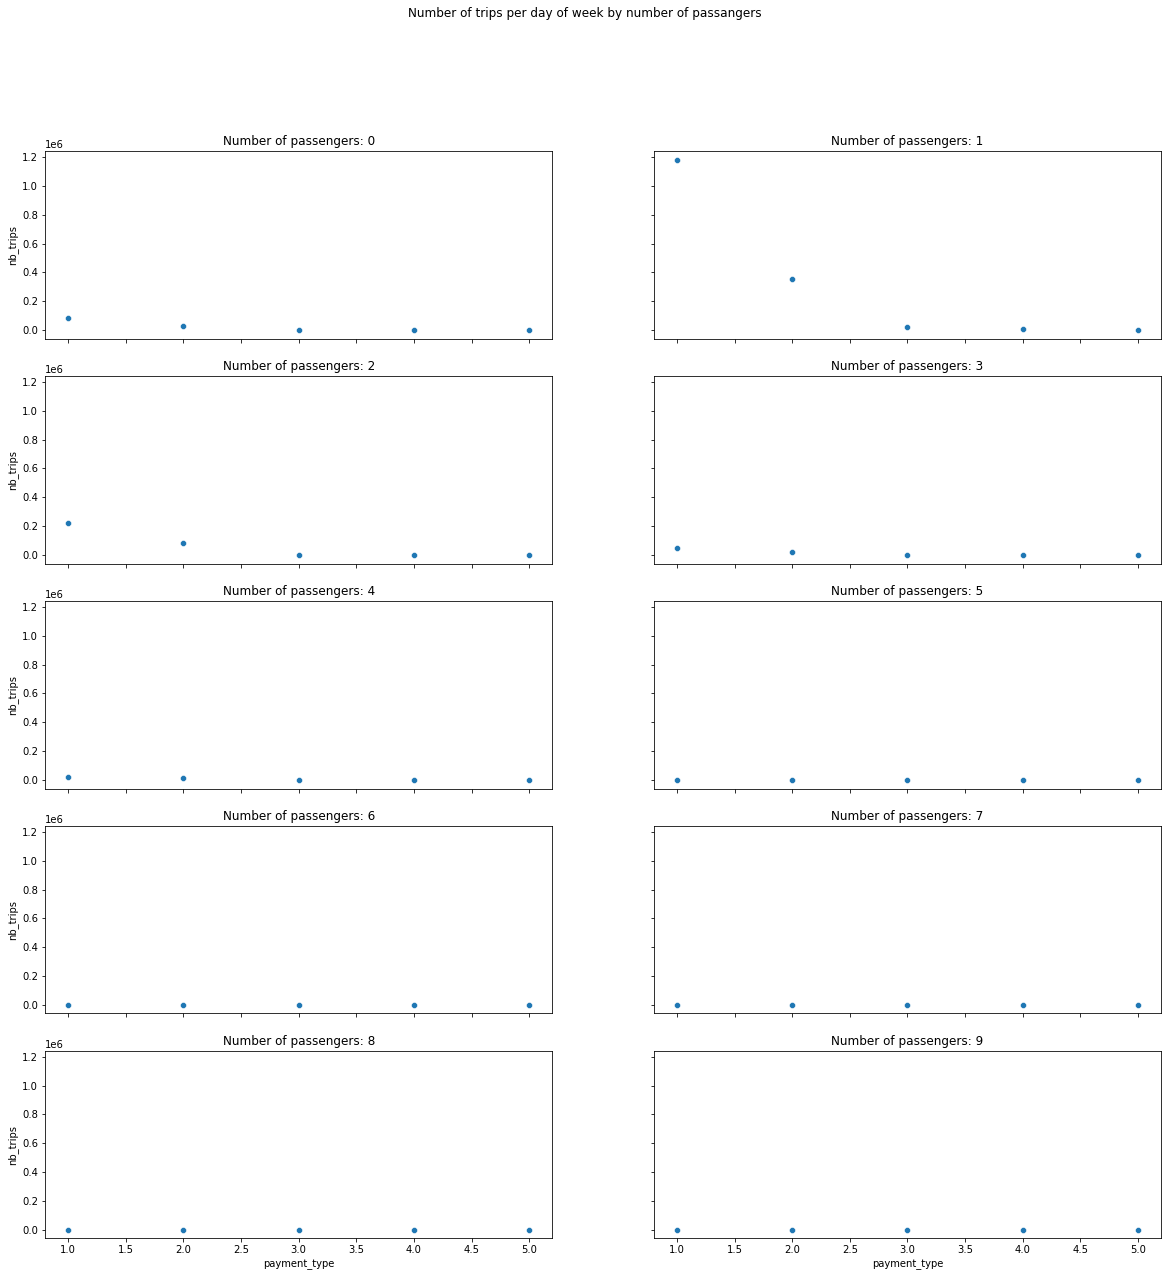

In [74]:
passenger_count = payment_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = payment_type_vs_pass_count[payment_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'payment_type', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

With 1 passenger there is a large discrapancy between Card, Cash and all the other methods. This same change can be seen more reduced with 0 and 2 passengers. The others seem to not have a prefered number of payment. This could also be because there is less data on those points so its not as indicative.

## API

In [58]:
import requests

Set the params for the API

In [64]:
city = "New York"
from_date = "2020-1-1"
to_date = "2020-3-31"

In [65]:
resp = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{}%20{}/{}/{}?unitGroup=metric&key=BA2ZMU7Z5G69FTJEAEVC328WT&include=obs%2Cstats%2Calerts".format(city.split(' ')[0], 
                                                                                            city.split(' ')[1], from_date, to_date))
type(resp)

requests.models.Response

In [66]:
resp.text

'{"queryCost":91,"latitude":40.7146,"longitude":-74.0071,"resolvedAddress":"New York, NY, United States","address":"New York","timezone":"America/New_York","tzoffset":-5.0,"days":[{"datetime":"2020-01-01","datetimeEpoch":1577854800,"tempmax":5.0,"tempmin":1.7,"temp":3.6,"feelslikemax":2.8,"feelslikemin":-2.8,"feelslike":-0.1,"dew":-4.2,"humidity":56.88,"precip":1.43,"precipprob":null,"precipcover":4.17,"preciptype":null,"snow":0.0,"snowdepth":0.0,"windgust":47.9,"windspeed":30.9,"winddir":270.4,"pressure":1008.1,"cloudcover":36.7,"visibility":16.0,"solarradiation":null,"solarenergy":null,"sunrise":"07:20:08","sunriseEpoch":1577881208,"sunset":"16:38:55","sunsetEpoch":1577914735,"moonphase":0.17,"conditions":"Rain, Partially cloudy","icon":"rain","stations":["72505394728","72055399999","KLGA","KJRB","KNYC","72503014732"],"source":"obs","normal":{"tempmax":[-5.7,5.6,15.9],"tempmin":[-12.9,-0.3,7.2],"feelslike":[-17.9,5.6,15.9],"precip":[0.0,4.5,38.8],"humidity":[39.6,62.2,91.8],"snowdept

Parsing the response string

In [67]:
import json

In [68]:
weather = json.loads(resp.text)
weather

{'queryCost': 91,
 'latitude': 40.7146,
 'longitude': -74.0071,
 'resolvedAddress': 'New York, NY, United States',
 'address': 'New York',
 'timezone': 'America/New_York',
 'tzoffset': -5.0,
 'days': [{'datetime': '2020-01-01',
   'datetimeEpoch': 1577854800,
   'tempmax': 5.0,
   'tempmin': 1.7,
   'temp': 3.6,
   'feelslikemax': 2.8,
   'feelslikemin': -2.8,
   'feelslike': -0.1,
   'dew': -4.2,
   'humidity': 56.88,
   'precip': 1.43,
   'precipprob': None,
   'precipcover': 4.17,
   'preciptype': None,
   'snow': 0.0,
   'snowdepth': 0.0,
   'windgust': 47.9,
   'windspeed': 30.9,
   'winddir': 270.4,
   'pressure': 1008.1,
   'cloudcover': 36.7,
   'visibility': 16.0,
   'solarradiation': None,
   'solarenergy': None,
   'sunrise': '07:20:08',
   'sunriseEpoch': 1577881208,
   'sunset': '16:38:55',
   'sunsetEpoch': 1577914735,
   'moonphase': 0.17,
   'conditions': 'Rain, Partially cloudy',
   'icon': 'rain',
   'stations': ['72505394728',
    '72055399999',
    'KLGA',
    'KJRB

In [69]:
weather.keys()

dict_keys(['queryCost', 'latitude', 'longitude', 'resolvedAddress', 'address', 'timezone', 'tzoffset', 'days', 'stations'])

In [70]:
weather['days']

[{'datetime': '2020-01-01',
  'datetimeEpoch': 1577854800,
  'tempmax': 5.0,
  'tempmin': 1.7,
  'temp': 3.6,
  'feelslikemax': 2.8,
  'feelslikemin': -2.8,
  'feelslike': -0.1,
  'dew': -4.2,
  'humidity': 56.88,
  'precip': 1.43,
  'precipprob': None,
  'precipcover': 4.17,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 47.9,
  'windspeed': 30.9,
  'winddir': 270.4,
  'pressure': 1008.1,
  'cloudcover': 36.7,
  'visibility': 16.0,
  'solarradiation': None,
  'solarenergy': None,
  'sunrise': '07:20:08',
  'sunriseEpoch': 1577881208,
  'sunset': '16:38:55',
  'sunsetEpoch': 1577914735,
  'moonphase': 0.17,
  'conditions': 'Rain, Partially cloudy',
  'icon': 'rain',
  'stations': ['72505394728',
   '72055399999',
   'KLGA',
   'KJRB',
   'KNYC',
   '72503014732'],
  'source': 'obs',
  'normal': {'tempmax': [-5.7, 5.6, 15.9],
   'tempmin': [-12.9, -0.3, 7.2],
   'feelslike': [-17.9, 5.6, 15.9],
   'precip': [0.0, 4.5, 38.8],
   'humidity': [39.6, 62.2, 91.8],
   

Check if we actually got the data for all the days

In [71]:
weather['days'][0]

{'datetime': '2020-01-01',
 'datetimeEpoch': 1577854800,
 'tempmax': 5.0,
 'tempmin': 1.7,
 'temp': 3.6,
 'feelslikemax': 2.8,
 'feelslikemin': -2.8,
 'feelslike': -0.1,
 'dew': -4.2,
 'humidity': 56.88,
 'precip': 1.43,
 'precipprob': None,
 'precipcover': 4.17,
 'preciptype': None,
 'snow': 0.0,
 'snowdepth': 0.0,
 'windgust': 47.9,
 'windspeed': 30.9,
 'winddir': 270.4,
 'pressure': 1008.1,
 'cloudcover': 36.7,
 'visibility': 16.0,
 'solarradiation': None,
 'solarenergy': None,
 'sunrise': '07:20:08',
 'sunriseEpoch': 1577881208,
 'sunset': '16:38:55',
 'sunsetEpoch': 1577914735,
 'moonphase': 0.17,
 'conditions': 'Rain, Partially cloudy',
 'icon': 'rain',
 'stations': ['72505394728',
  '72055399999',
  'KLGA',
  'KJRB',
  'KNYC',
  '72503014732'],
 'source': 'obs',
 'normal': {'tempmax': [-5.7, 5.6, 15.9],
  'tempmin': [-12.9, -0.3, 7.2],
  'feelslike': [-17.9, 5.6, 15.9],
  'precip': [0.0, 4.5, 38.8],
  'humidity': [39.6, 62.2, 91.8],
  'snowdepth': [None, None, None],
  'windspee

In [72]:
weather['days'][-1]

{'datetime': '2020-03-31',
 'datetimeEpoch': 1585627200,
 'tzoffset': -4.0,
 'tempmax': 7.9,
 'tempmin': 5.6,
 'temp': 6.6,
 'feelslikemax': 7.2,
 'feelslikemin': 1.5,
 'feelslike': 4.5,
 'dew': 3.3,
 'humidity': 79.29,
 'precip': 1.01,
 'precipprob': None,
 'precipcover': 8.33,
 'preciptype': None,
 'snow': 0.0,
 'snowdepth': 0.0,
 'windgust': 31.7,
 'windspeed': 23.7,
 'winddir': 113.5,
 'pressure': 1016.1,
 'cloudcover': 49.3,
 'visibility': 15.1,
 'solarradiation': None,
 'solarenergy': None,
 'sunrise': '06:40:17',
 'sunriseEpoch': 1585651217,
 'sunset': '19:20:22',
 'sunsetEpoch': 1585696822,
 'moonphase': 0.2,
 'conditions': 'Rain, Partially cloudy',
 'icon': 'rain',
 'stations': ['72505394728',
  '72055399999',
  'KLGA',
  'KJRB',
  'KNYC',
  '72503014732'],
 'source': 'obs',
 'normal': {'tempmax': [5.7, 12.4, 22.9],
  'tempmin': [-0.6, 5.0, 10.9],
  'feelslike': [-6.3, 12.4, 22.9],
  'precip': [0.0, 5.7, 32.2],
  'humidity': [28.6, 63.5, 99.8],
  'snowdepth': [None, None, None

We should have 91 rows in our dataset, as there were 91 days in 2020 January, February and March

In [73]:
len(weather['days'])

91

Transform data to a dataframe

In [88]:
weather_df = pd.DataFrame(weather['days'])
weather_df

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,sunsetEpoch,moonphase,conditions,icon,stations,source,normal,hours,tzoffset
0,2020-01-01,1577854800,5.0,1.7,3.6,2.8,-2.8,-0.1,-4.2,56.88,...,16:38:55,1577914735,0.17,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-5.7, 5.6, 15.9], 'tempmin': [-12...",None,NaN
1,2020-01-02,1577941200,8.9,0.7,4.8,7.7,-3.5,2.0,-2.4,60.21,...,16:39:46,1578001186,0.22,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-4.3, 3.9, 10.9], 'tempmin': [-12...",None,NaN
2,2020-01-03,1578027600,8.4,6.7,7.6,7.3,4.9,6.2,5.0,83.95,...,16:40:38,1578087638,0.26,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-6.7, 3.4, 14.3], 'tempmin': [-12...",None,NaN
3,2020-01-04,1578114000,9.4,6.7,8.2,9.4,5.6,7.4,7.2,93.49,...,16:41:32,1578174092,0.31,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-2.8, 4.5, 13.9], 'tempmin': [-12...",None,NaN
4,2020-01-05,1578200400,7.1,2.8,4.6,6.6,-0.5,2.5,-4.3,52.98,...,16:42:27,1578260547,0.36,"Snow, Partially cloudy",snow,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-6.3, 4.4, 16.9], 'tempmin': [-11...",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-03-27,1585281600,21.0,10.0,14.3,15.5,1.0,7.7,3.1,52.18,...,19:16:10,1585350970,0.04,Clear,clear-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [4.7, 11.2, 25.1], 'tempmin': [-5....",None,-4.0
87,2020-03-28,1585368000,12.8,7.8,9.3,21.0,10.0,14.3,2.9,67.86,...,19:17:13,1585437433,0.07,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [4.4, 11.6, 19.2], 'tempmin': [-2....",None,-4.0
88,2020-03-29,1585454400,8.3,7.2,7.9,12.8,4.1,7.2,6.8,92.80,...,19:18:16,1585523896,0.11,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [7.2, 12.9, 20.1], 'tempmin': [-3....",None,-4.0
89,2020-03-30,1585540800,10.0,6.6,8.3,5.5,2.7,4.4,6.0,85.17,...,19:19:19,1585610359,0.15,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [5.7, 13.0, 21.7], 'tempmin': [-2....",None,-4.0


In [89]:
weather_df.drop(['datetimeEpoch', 'solarradiation', 'solarenergy','sunriseEpoch','sunsetEpoch' ,'stations', 'source', 'normal', 'hours', 'tzoffset', 'icon','precipprob', 'preciptype', 'precipcover', 'windgust', 'winddir'], axis='columns', inplace=True)
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,2020-01-01,5.0,1.7,3.6,2.8,-2.8,-0.1,-4.2,56.88,1.43,0.00,0.00,30.9,1008.1,36.7,16.0,07:20:08,16:38:55,0.17,"Rain, Partially cloudy"
1,2020-01-02,8.9,0.7,4.8,7.7,-3.5,2.0,-2.4,60.21,0.99,0.00,0.00,20.2,1013.9,4.3,16.0,07:20:14,16:39:46,0.22,Rain
2,2020-01-03,8.4,6.7,7.6,7.3,4.9,6.2,5.0,83.95,3.41,0.00,0.00,11.1,1010.1,40.8,12.5,07:20:18,16:40:38,0.26,"Rain, Partially cloudy"
3,2020-01-04,9.4,6.7,8.2,9.4,5.6,7.4,7.2,93.49,4.11,0.00,0.00,11.1,1003.7,46.8,8.5,07:20:20,16:41:32,0.31,"Rain, Partially cloudy"
4,2020-01-05,7.1,2.8,4.6,6.6,-0.5,2.5,-4.3,52.98,0.00,1.88,1.87,15.0,1010.1,37.2,16.0,07:20:20,16:42:27,0.36,"Snow, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-03-27,21.0,10.0,14.3,15.5,1.0,7.7,3.1,52.18,0.00,0.00,0.00,16.2,1011.5,19.5,16.0,06:46:53,19:16:10,0.04,Clear
87,2020-03-28,12.8,7.8,9.3,21.0,10.0,14.3,2.9,67.86,0.54,0.00,0.00,25.6,1018.8,34.7,13.9,06:45:14,19:17:13,0.07,"Rain, Partially cloudy"
88,2020-03-29,8.3,7.2,7.9,12.8,4.1,7.2,6.8,92.80,0.71,0.00,0.00,34.9,1013.9,52.8,6.9,06:43:35,19:18:16,0.11,"Rain, Partially cloudy"
89,2020-03-30,10.0,6.6,8.3,5.5,2.7,4.4,6.0,85.17,1.21,0.00,0.00,20.0,1014.2,48.5,15.7,06:41:56,19:19:19,0.15,"Rain, Partially cloudy"


In [90]:
weather_df.dtypes

datetime         object
tempmax         float64
tempmin         float64
temp            float64
feelslikemax    float64
feelslikemin    float64
feelslike       float64
dew             float64
humidity        float64
precip          float64
snow            float64
snowdepth       float64
windspeed       float64
pressure        float64
cloudcover      float64
visibility      float64
sunrise          object
sunset           object
moonphase       float64
conditions       object
dtype: object

Change datetime to datetime format for the merge

In [100]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%Y-%m-%d')

In [91]:
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%H:%M:%S')
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%H:%M:%S')

In [92]:
weather_df.dtypes

datetime                object
tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
snow                   float64
snowdepth              float64
windspeed              float64
pressure               float64
cloudcover             float64
visibility             float64
sunrise         datetime64[ns]
sunset          datetime64[ns]
moonphase              float64
conditions              object
dtype: object

In [81]:
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,2020-01-01,5.0,1.7,3.6,2.8,-2.8,-0.1,-4.2,56.88,1.43,0.00,0.00,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
1,2020-01-02,8.9,0.7,4.8,7.7,-3.5,2.0,-2.4,60.21,0.99,0.00,0.00,20.2,1013.9,4.3,16.0,1900-01-01 07:20:14,1900-01-01 16:39:46,0.22,Rain
2,2020-01-03,8.4,6.7,7.6,7.3,4.9,6.2,5.0,83.95,3.41,0.00,0.00,11.1,1010.1,40.8,12.5,1900-01-01 07:20:18,1900-01-01 16:40:38,0.26,"Rain, Partially cloudy"
3,2020-01-04,9.4,6.7,8.2,9.4,5.6,7.4,7.2,93.49,4.11,0.00,0.00,11.1,1003.7,46.8,8.5,1900-01-01 07:20:20,1900-01-01 16:41:32,0.31,"Rain, Partially cloudy"
4,2020-01-05,7.1,2.8,4.6,6.6,-0.5,2.5,-4.3,52.98,0.00,1.88,1.87,15.0,1010.1,37.2,16.0,1900-01-01 07:20:20,1900-01-01 16:42:27,0.36,"Snow, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-03-27,21.0,10.0,14.3,15.5,1.0,7.7,3.1,52.18,0.00,0.00,0.00,16.2,1011.5,19.5,16.0,1900-01-01 06:46:53,1900-01-01 19:16:10,0.04,Clear
87,2020-03-28,12.8,7.8,9.3,21.0,10.0,14.3,2.9,67.86,0.54,0.00,0.00,25.6,1018.8,34.7,13.9,1900-01-01 06:45:14,1900-01-01 19:17:13,0.07,"Rain, Partially cloudy"
88,2020-03-29,8.3,7.2,7.9,12.8,4.1,7.2,6.8,92.80,0.71,0.00,0.00,34.9,1013.9,52.8,6.9,1900-01-01 06:43:35,1900-01-01 19:18:16,0.11,"Rain, Partially cloudy"
89,2020-03-30,10.0,6.6,8.3,5.5,2.7,4.4,6.0,85.17,1.21,0.00,0.00,20.0,1014.2,48.5,15.7,1900-01-01 06:41:56,1900-01-01 19:19:19,0.15,"Rain, Partially cloudy"


Export the data to csv

In [82]:
weather_df.to_csv("C:/Users/MViki/Documents/CEU/Winter_semester/Coding_3/Term_project/Python_Final_Project/Data/Weather_data_jan-mar.csv")

# Create merged file

In [101]:
jan['pickup_date'] = pd.to_datetime(jan['pickup_date'], format='%Y-%m-%d')

In [102]:
df_2 = pd.merge(jan, weather_df, how='left', left_on="pickup_date", right_on="datetime")
df_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238,239,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239,238,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238,238,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238,151,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
4,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2,0.7,1.0,N,246,48,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1,2020-01-31 23:31:46,2020-01-31 23:41:29,1,1.3,1.0,N,100,233,2.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094435,1,2020-01-31 23:26:26,2020-01-31 23:48:26,1,4.0,1.0,N,79,48,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094436,1,2020-01-31 23:02:57,2020-01-31 23:15:20,4,2.4,1.0,N,230,236,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094437,1,2020-01-31 23:25:53,2020-01-31 23:35:44,1,1.4,1.0,N,237,140,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"


In [103]:
df_2.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date              datetime64[ns]
day                               int64
hour                              int64
dayofweek                        object
datetime                 datetime64[ns]
tempmax                         float64
tempmin                         float64


# Question II.

<AxesSubplot:xlabel='temp'>

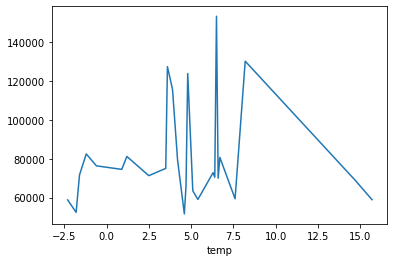

In [105]:
df_2.groupby("temp").size().plot()

<AxesSubplot:xlabel='feelslike'>

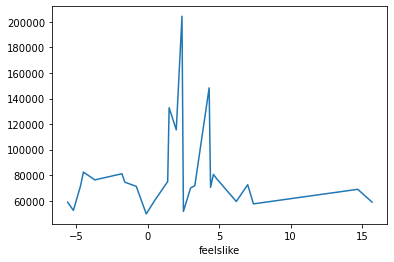

In [108]:
df_2.groupby("feelslike").size().plot()

<AxesSubplot:xlabel='tempmin'>

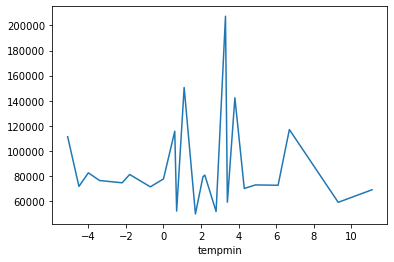

In [106]:
df_2.groupby("tempmin").size().plot()

<AxesSubplot:xlabel='precip'>

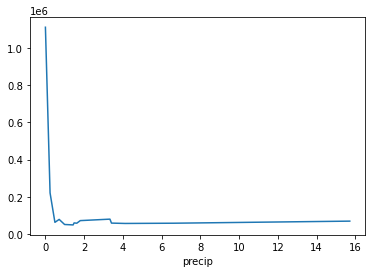

In [109]:
df_2.groupby("precip").size().plot()

<AxesSubplot:xlabel='conditions'>

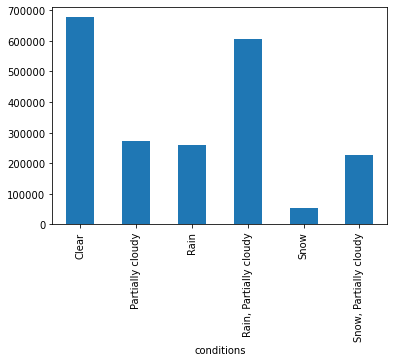

In [111]:
df_2.groupby("conditions").size().plot(kind="bar")

<AxesSubplot:xlabel='temp', ylabel='total_amount'>

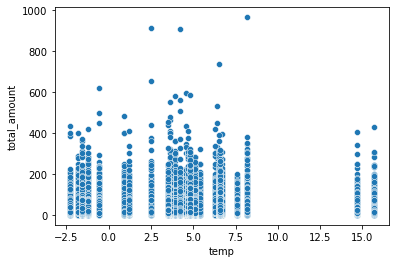

In [112]:
sns.scatterplot(data=df_2, x="temp", y="total_amount")

# Clustering

Create data frame to use 

In [125]:
clust = df_2[['passenger_count', 
             'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
             'payment_type', 'fare_amount', 'extra', 'tip_amount', 'total_amount',
             'dayofweek']]
clust

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,dayofweek
0,1,1.2,1.0,238,239,1.0,6.0,3.0,1.47,11.27,Wednesday
1,1,1.2,1.0,239,238,1.0,7.0,3.0,1.50,12.30,Wednesday
2,1,0.6,1.0,238,238,1.0,6.0,3.0,1.00,10.80,Wednesday
3,1,0.8,1.0,238,151,1.0,5.5,0.5,1.36,8.16,Wednesday
4,2,0.7,1.0,246,48,1.0,8.0,3.0,2.35,14.15,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2094434,1,1.3,1.0,100,233,2.0,8.0,3.0,0.00,11.80,Friday
2094435,1,4.0,1.0,79,48,1.0,16.5,3.0,4.05,24.35,Friday
2094436,4,2.4,1.0,230,236,1.0,10.5,3.0,2.15,16.45,Friday
2094437,1,1.4,1.0,237,140,1.0,8.5,3.0,1.00,13.30,Friday


In [128]:
clust["dayofweek"] = pd.to_datetime(clust["dayofweek"])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-03 00:00:00

Import packages

In [113]:
from sklearn import datasets
from sklearn.preprocessing import scale # for scaling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

Define functions

In [123]:
def draw_cluster_plot(clust, estimator, figsize=(20,40), cmap_name='summer'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(clust.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//3,ncols=3, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        clust.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//3, i%3],colorbar=False)
        i += 1
    plt.show()
    

def fit_kmeans(data, num_clusters, init_method):
    if init_method == 'pca':
        pca = PCA(n_components=num_clusters).fit(data)
        estimator = KMeans(init=pca.components_, n_clusters=num_clusters)
    else:
        estimator = KMeans(init=init_method, n_clusters=num_clusters)
    
    estimator.fit(data)
    return estimator

In [124]:
# Build a dictionary to look for the elbow point
dists_dict = {}

data = scale(clust)

for init_method in ['k-means++','random']:
    dists_dict[init_method] = []
    for i in range(2,10):      
        estimator = fit_kmeans(data, i, init_method)
        dists_dict[init_method].append(estimator.inertia_)

ValueError: could not convert string to float: 'Wednesday'